In [214]:
import torch
import numpy as np
import math

1. Draw Computation Graph and work out the gradient dz/da by following the path
back from z to a and compare the result with the analytical gradient.

        x = 2*a + 3*b
        y = 5*a*a + 3*b*b*b
        z = 2*x + 3*y

In [215]:
a=torch.tensor([3.0],requires_grad=True)
b=torch.tensor([5.0],requires_grad=True)

In [216]:
x=2*a+3*b
y=5*a*a+3*b*b*b
z=2*x+3*y
z.backward()

print('Pytorch\ndz/da: ',a.grad.item(),'\ndz/db: ',b.grad.item())
print('\nAnalytical\ndz/da: ',2*2+3*10*a,'\ndz/db: ',2*3+27*b*b)

Pytorch
dz/da:  94.0 
dz/db:  681.0

Analytical
dz/da:  tensor([94.], grad_fn=<AddBackward0>) 
dz/db:  tensor([681.], grad_fn=<AddBackward0>)


2. For the following Computation Graph, work out the gradient da/dw by following the path back from a to w and compare the result with the analytical gradient.

    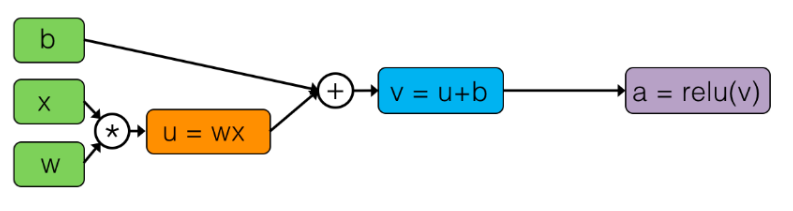

In [217]:
b=torch.tensor([2.0],requires_grad=True)
x=torch.rand(1)
w=torch.tensor([4.0],requires_grad=True)

In [218]:
def relu(x):
    return max(0,x)

def relu_deriv(x):
    return 1.0 if x>0 else 0.0

u=w*x
v=u+b
a=relu(v)

a.backward()

print('Pytorch\nda/dw: ',w.grad.item(),'\nda/db: ',b.grad.item())
print('\nAnalytical\nda/dw: ',relu_deriv(v)*x.item(),'\nda/db: ',relu_deriv(v))

Pytorch
da/dw:  0.4411991834640503 
da/db:  1.0

Analytical
da/dw:  0.4411991834640503 
da/db:  1.0


3. Repeat the Problem 2 using Sigmoid function

In [219]:
b=torch.tensor([2.0],requires_grad=True)
x=torch.rand(1)
w=torch.tensor([4.0],requires_grad=True)

In [220]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

def sigmoid_deriv(y):
    return y*(1-y)

u=w*x
v=u+b
a=sigmoid(v)

a.backward()

print('Pytorch\nda/dw: ',w.grad.item(),'\nda/db: ',b.grad.item())
print('\nAnalytical\nda/dw: ',(sigmoid_deriv(a)*x).item(),'\nda/db: ',sigmoid_deriv(a).item())

Pytorch
da/dw:  0.011338641867041588 
da/db:  0.042618390172719955

Analytical
da/dw:  0.011338629759848118 
da/db:  0.042618341743946075


4. Verify that the gradients provided by PyTorch match with the analytical gradients of the function 
            
        f = exp(-x2-2x-sin(x)) 
    w.r.t x

In [221]:
x=torch.rand(1,requires_grad=True)

In [222]:
def fn(x):
    return torch.exp(-1*x**2-2*x-torch.sin(x))

def fn_deriv(x):
    return torch.exp(-1*x**2-2*x-torch.sin(x))*(-2*x-2-torch.cos(x))

y=fn(x)
y.backward()
 
print('Pytorch\ndy/dx: ',x.grad.item())
print('\nAnalytical\nda/dw: ',fn_deriv(x).item())

Pytorch
dy/dx:  -1.2339544296264648

Analytical
da/dw:  -1.2339544296264648


5. Compute gradient for the function: 
    
        y = 8x4+ 3x3 + 7x2+ 6x+ 3 

    and verify the gradients provided by PyTorch with the analytical gradients. A snapshot of the Python code is provided below.

In [223]:
def fn(x):
    return 8*x**4+3*x**3+7*x**2+6*x+3

def fn_deriv(x):
    return 32*x**3+9*x**2+14*x+6

y=fn(x)
y.backward()

print('Pytorch\ndy/dx: ',x.grad.item())
print('\nAnalytical\nda/dw: ',fn_deriv(x).item())

Pytorch
dy/dx:  11.318523406982422

Analytical
da/dw:  12.552477836608887


6. For the following function, computation graph is provided below.

    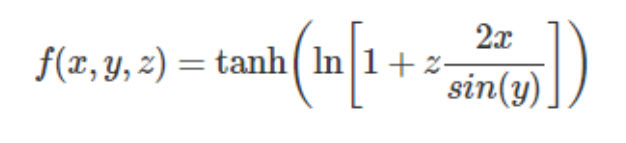

    Calculate the intermediate variables a,b,c,d, and e in the forward pass. Starting from f,
    calculate the gradient of each expression in the backward pass manually. Calculate ∂f/∂y
    using the computational graph and chain rule. Use the chain rule to calculate gradient and
    compare with analytical gradient.

In [224]:
x=torch.rand(1,requires_grad=True)
y=torch.rand(1,requires_grad=True)
z=torch.rand(1,requires_grad=True)

In [225]:
a=2*x
b=torch.sin(y)
c=a/b
d=c*z
e=torch.log(d)
f=torch.tanh(e)

print(f'a={a}\nb={b}\nc={c}\nd={d}\ne={e}\nf={f}')

a=tensor([0.2436], grad_fn=<MulBackward0>)
b=tensor([0.6226], grad_fn=<SinBackward0>)
c=tensor([0.3912], grad_fn=<DivBackward0>)
d=tensor([0.1496], grad_fn=<MulBackward0>)
e=tensor([-1.9000], grad_fn=<LogBackward0>)
f=tensor([-0.9562], grad_fn=<TanhBackward0>)


In [226]:
def dbdy(y):
    return torch.cos(y)
def dcdb(a,b):
    return -a/b**2
def dddc(z):
    return z
def dedd(d):
    return 1/(1+d)
def dfde(e):
    return 1-torch.tanh(e)**2
    

dfdy=dfde(e)*dedd(d)*dddc(z)*dcdb(a,b)*dbdy(y)

In [227]:
f.backward()

print('Pytorch\ndf/dy: ',y.grad.item())
print('\nAnalytical\ndf/dy: ',dfdy.item())

Pytorch
df/dy:  -0.10761818289756775

Analytical
df/dy:  -0.014002321287989616
